<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
sentiment=ctrl.Antecedent(np.arange(0,1,0.1),'sentiment')
emotional=ctrl.Antecedent(np.arange(0,3.1,0.1),'emotional')
negative_number=ctrl.Antecedent(np.arange(0,10,0.5),'negative_number')
positive_number=ctrl.Antecedent(np.arange(0,10,0.5),'positive_number')
#output
sentiment_classification=ctrl.Consequent(np.arange(0,3,0.5),'sentiment_classification')

In [ ]:
sentiment['m']=fuzz.trimf(sentiment.universe,[0,0,0.3])
sentiment['n']=fuzz.trimf(sentiment.universe,[0.2,0.5,0.7])
sentiment['p']=fuzz.trimf(sentiment.universe,[0.6,0.7,0.9])
emotional['l']=fuzz.trimf(emotional.universe,[0,0,1])
emotional['m']=fuzz.trimf(emotional.universe,[0,1,2])
emotional['h']=fuzz.trimf(emotional.universe,[1,3,3])
negative_number['f']=fuzz.trimf(negative_number.universe,[0,0,2])
negative_number['s']=fuzz.trimf(negative_number.universe,[1.8,3,5])
negative_number['m']=fuzz.trimf(negative_number.universe,[2.4,5,9])
positive_number['f']=fuzz.trimf(positive_number.universe,[0,0,2])
positive_number['s']=fuzz.trimf(positive_number.universe,[1.5,3,5])
positive_number['m']=fuzz.trimf(positive_number.universe,[2.5,5,9])
sentiment_classification['n']=fuzz.trimf(sentiment_classification.universe,[0,0,1])
sentiment_classification['m']=fuzz.trimf(sentiment_classification.universe,[0.5,1,2])
sentiment_classification['p']=fuzz.trimf(sentiment_classification.universe,[1,3,3])


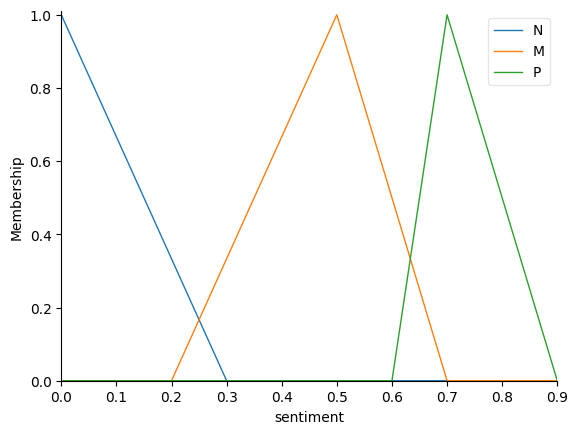

In [ ]:
sentiment.view()

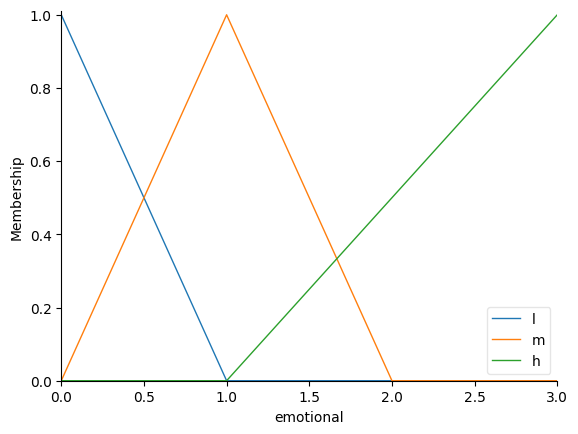

In [ ]:
emotional.view()

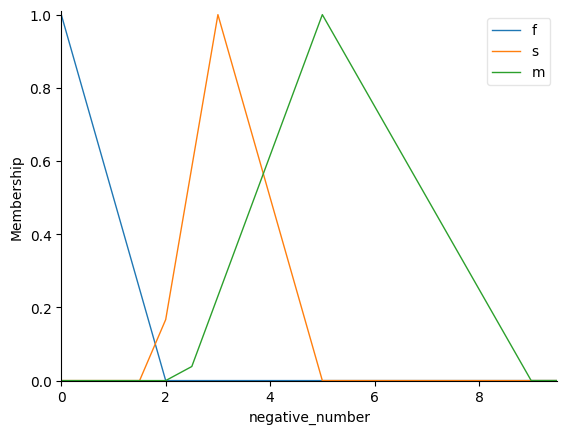

In [ ]:
negative_number.view()

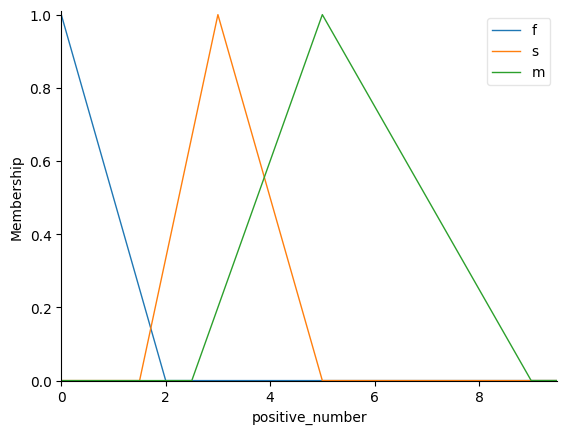

In [ ]:
positive_number.view()

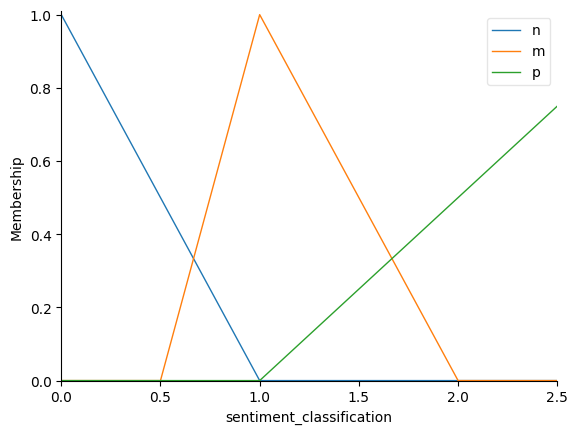

In [ ]:
sentiment_classification.view()


In [ ]:
#luật dựa trên cảm xúc và cường độ cảm xúc
rule1=ctrl.Rule(sentiment['n']&emotional['h'],sentiment_classification['n'])
rule2=ctrl.Rule(sentiment['n']&emotional['l'],sentiment_classification['m'])
rule3=ctrl.Rule(sentiment['m']&emotional['m'],sentiment_classification['m'])
rule4=ctrl.Rule(sentiment['p']&emotional['h'],sentiment_classification['m'])
#luật dựa trên số lượng tích cực và tiêu cực
rule5=ctrl.Rule(positive_number['m']&negative_number['f'],sentiment_classification['p'])
rule6=ctrl.Rule(positive_number['s']&negative_number['m'],sentiment_classification['p'])
rule7=ctrl.Rule(positive_number['f']&negative_number['s'],sentiment_classification['m'])
#luật kết hợp
rule8=ctrl.Rule(sentiment['n']&negative_number['m']&emotional['h'],sentiment_classification['n'])
rule9=ctrl.Rule(sentiment['m']&positive_number['s']&emotional['m'],sentiment_classification['m'])
rule10=ctrl.Rule(sentiment['p']&negative_number['m']&emotional['h'],sentiment_classification['p'])


1.2857142857142858


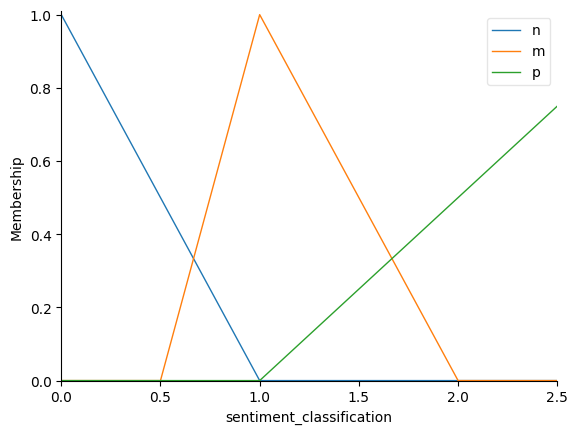

In [ ]:
evaluate=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
sim=ctrl.ControlSystemSimulation(evaluate)
sim.input['sentiment']=0.4
sim.input['emotional']=2
sim.input['negative_number']=7
sim.input['positive_number']=3
sim.compute()
print(sim.output['sentiment_classification'])
sentiment_classification.view(sim)